# Support Vector Machines for Linear and non-Linear Classification Tasks

In [3]:
# Importing the necessary libraries

# numpy for numerical operations
import numpy as np

# matplotlib for plotting
import matplotlib.pyplot as plt

# scikit-learn for machine learning algorithms
from sklearn import svm

# To split the dataset into train and test sets
from sklearn.model_selection import train_test_split

# To perform k-fold cross validation
from sklearn.model_selection import cross_val_score

# To perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# To check the accuracy of the model
from sklearn.metrics import accuracy_score

# To generate confusion matrix, classification report
from sklearn.metrics import classification_report, confusion_matrix

# To support plot in Jupyter notebook
%matplotlib inline

# Load and Preprocess the Datasets
Load the breast cancer dataset and another non-linear dataset, and preprocess them.

In [4]:
# Importing the necessary libraries for data loading and preprocessing
from sklearn.datasets import load_breast_cancer, make_circles
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
cancer_dataset = load_breast_cancer()

# Load a non-linear dataset
non_linear_dataset = make_circles(noise=0.2, factor=0.5, random_state=1)

# Preprocess the datasets
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Preprocess the breast cancer dataset
X_cancer = scaler.fit_transform(cancer_dataset.data)
y_cancer = cancer_dataset.target

# Preprocess the non-linear dataset
X_non_linear = scaler.fit_transform(non_linear_dataset[0])
y_non_linear = non_linear_dataset[1]

# Split the datasets into training and testing sets
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)
X_non_linear_train, X_non_linear_test, y_non_linear_train, y_non_linear_test = train_test_split(X_non_linear, y_non_linear, test_size=0.2, random_state=42)

# Train SVM with Linear Kernel on Breast Cancer Dataset
Train a Support Vector Machine with a linear kernel on the breast cancer dataset.

In [5]:
# Define the SVM with linear kernel
svm_linear = svm.SVC(kernel='linear')

# Train the SVM
svm_linear.fit(X_cancer_train, y_cancer_train)

# Predict the labels of the test set
y_cancer_pred = svm_linear.predict(X_cancer_test)

# Print the accuracy of the SVM with linear kernel
print("Accuracy of SVM with Linear Kernel: ", accuracy_score(y_cancer_test, y_cancer_pred))

# Print the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_cancer_test, y_cancer_pred))

# Print the classification report
print("Classification Report: \n", classification_report(y_cancer_test, y_cancer_pred))

Accuracy of SVM with Linear Kernel:  0.956140350877193
Confusion Matrix: 
 [[41  2]
 [ 3 68]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# Visualize Decision Boundary and Scatter Plot for Linear SVM
Visualize the decision boundary and scatter plot for the linear SVM using matplotlib.

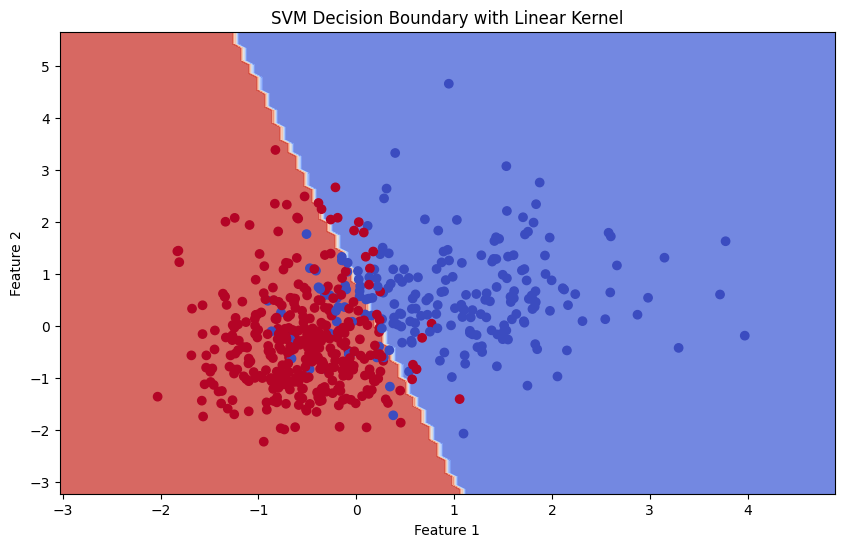

In [11]:
# Choose the first two features. You can choose any two features you like.
X_cancer_2d = X_cancer[:, :2]

# Train the SVM on the two-dimensional data
svm_linear_2d = svm.SVC(kernel='linear')
svm_linear_2d.fit(X_cancer_2d, y_cancer)

# Visualize the decision boundary and scatter plot for the linear SVM
plt.figure(figsize=(10, 6))

# Create a mesh to plot in
x_min, x_max = X_cancer_2d[:, 0].min() - 1, X_cancer_2d[:, 0].max() + 1
y_min, y_max = X_cancer_2d[:, 1].min() - 1, X_cancer_2d[:, 1].max() + 1
h = (x_max - x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
Z = svm_linear_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_cancer_2d[:, 0], X_cancer_2d[:, 1], c=y_cancer, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.title('SVM Decision Boundary with Linear Kernel')
plt.show()

# Classification Report and Accuracy for Linear SVM
Generate a classification report and calculate the accuracy for the linear SVM.

In [7]:
# Generate a classification report and calculate the accuracy for the linear SVM
# Predict the labels of the test set
y_cancer_pred = svm_linear.predict(X_cancer_test)

# Print the accuracy of the SVM with linear kernel
print("Accuracy of SVM with Linear Kernel: ", accuracy_score(y_cancer_test, y_cancer_pred))

# Print the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_cancer_test, y_cancer_pred))

# Print the classification report
print("Classification Report: \n", classification_report(y_cancer_test, y_cancer_pred))

Accuracy of SVM with Linear Kernel:  0.956140350877193
Confusion Matrix: 
 [[41  2]
 [ 3 68]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# ROC Curve for Linear SVM
Plot the ROC curve for the linear SVM.

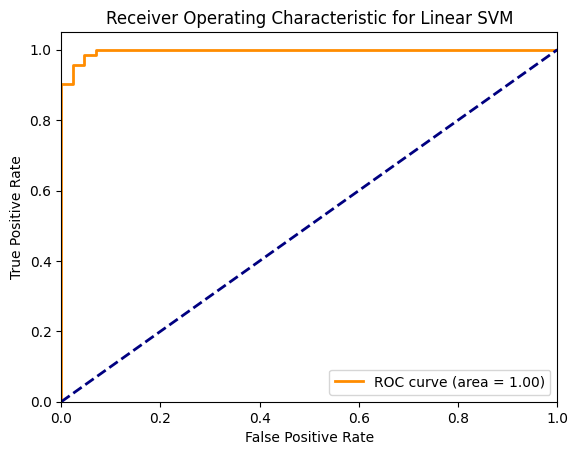

In [8]:
# Importing the necessary library for ROC curve and AUC score
from sklearn.metrics import roc_curve, auc

# Compute the probabilities of the test predictions
y_cancer_pred_prob = svm_linear.decision_function(X_cancer_test)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_cancer_test, y_cancer_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Linear SVM')
plt.legend(loc="lower right")
plt.show()

# Train SVM with Non-Linear Kernel on Non-Linear Dataset
Train a Support Vector Machine with a non-linear kernel on the non-linear dataset.

Accuracy of SVM with Non-Linear Kernel:  0.8
Confusion Matrix: 
 [[7 0]
 [4 9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



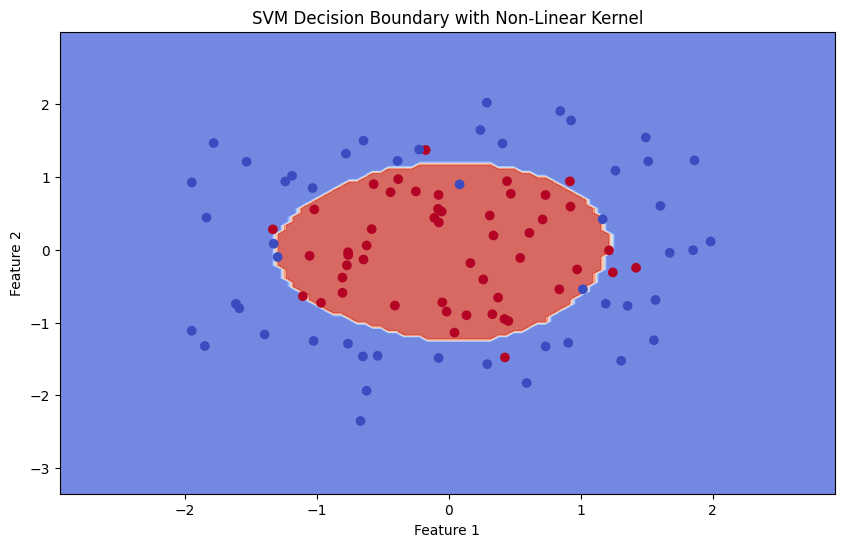

In [17]:
# Define the SVM with non-linear kernel (RBF)
svm_non_linear = svm.SVC(kernel='rbf')

# Train the SVM
svm_non_linear.fit(X_non_linear_train, y_non_linear_train)

# Predict the labels of the test set
y_non_linear_pred = svm_non_linear.predict(X_non_linear_test)

# Print the accuracy of the SVM with non-linear kernel
print("Accuracy of SVM with Non-Linear Kernel: ", accuracy_score(y_non_linear_test, y_non_linear_pred))

# Print the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_non_linear_test, y_non_linear_pred))

# Print the classification report
print("Classification Report: \n", classification_report(y_non_linear_test, y_non_linear_pred))

# Visualize the decision boundary and scatter plot for the non-linear SVM
plt.figure(figsize=(10, 6))

# Create a mesh to plot in
x_min, x_max = X_non_linear[:, 0].min() - 1, X_non_linear[:, 0].max() + 1
y_min, y_max = X_non_linear[:, 1].min() - 1, X_non_linear[:, 1].max() + 1
h = (x_max - x_min)/100  # Corrected this line
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
Z = svm_non_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_non_linear[:, 0], X_non_linear[:, 1], c=y_non_linear, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.title('SVM Decision Boundary with Non-Linear Kernel')
plt.show()

# Compute the probabilities of the test predictions
y_non_linear_pred_prob = svm_non_linear.decision_function(X_non_linear_test)

# Visualize Decision Boundary and Scatter Plot for Non-Linear SVM
Visualize the decision boundary and scatter plot for the non-linear SVM using matplotlib. The decision boundary should be three-dimensional.

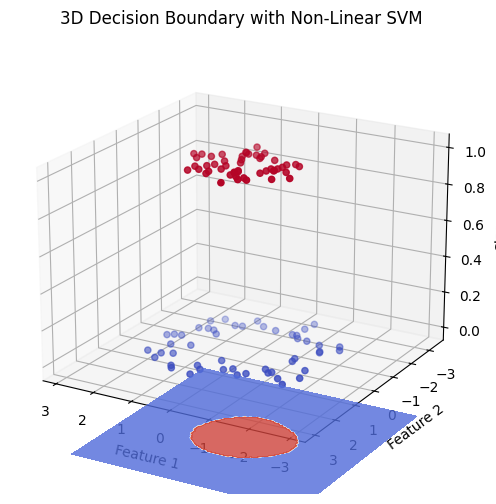

In [18]:
# Importing the necessary library for 3D plotting
from mpl_toolkits.mplot3d import Axes3D

# Define the SVM with non-linear kernel (RBF)
svm_non_linear = svm.SVC(kernel='rbf')

# Train the SVM
svm_non_linear.fit(X_non_linear_train, y_non_linear_train)

# Create a mesh to plot in
x_min, x_max = X_non_linear[:, 0].min() - 1, X_non_linear[:, 0].max() + 1
y_min, y_max = X_non_linear[:, 1].min() - 1, X_non_linear[:, 1].max() + 1
h = (x_max - x_min)/100  # Corrected this line
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary in 3D. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
Z = svm_non_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a 3D plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary
ax.contourf(xx, yy, Z, zdir='z', offset=-0.5, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
ax.scatter(X_non_linear[:, 0], X_non_linear[:, 1], y_non_linear, c=y_non_linear, cmap=plt.cm.coolwarm)

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Class')
ax.set_title('3D Decision Boundary with Non-Linear SVM')

# Set the view angle
ax.view_init(elev=20, azim=120)

plt.show()

# Classification Report and Accuracy for Non-Linear SVM
Generate a classification report and calculate the accuracy for the non-linear SVM.

In [15]:
# Generate a classification report and calculate the accuracy for the non-linear SVM
# Predict the labels of the test set
y_non_linear_pred = svm_non_linear.predict(X_non_linear_test)

# Print the accuracy of the SVM with non-linear kernel
print("Accuracy of SVM with Non-Linear Kernel: ", accuracy_score(y_non_linear_test, y_non_linear_pred))

# Print the confusion matrix
print("Confusion Matrix: \n", confusion_matrix(y_non_linear_test, y_non_linear_pred))

# Print the classification report
print("Classification Report: \n", classification_report(y_non_linear_test, y_non_linear_pred))

Accuracy of SVM with Non-Linear Kernel:  0.8
Confusion Matrix: 
 [[7 0]
 [4 9]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.69      0.82        13

    accuracy                           0.80        20
   macro avg       0.82      0.85      0.80        20
weighted avg       0.87      0.80      0.80        20



# ROC Curve for Non-Linear SVM
Plot the ROC curve for the non-linear SVM.

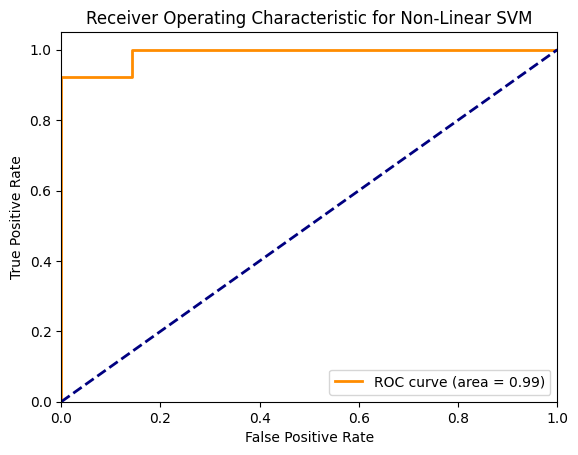

In [16]:
# Compute the probabilities of the test predictions for non-linear SVM
y_non_linear_pred_prob = svm_non_linear.decision_function(X_non_linear_test)

# Compute ROC curve and ROC area for each class
fpr_non_linear, tpr_non_linear, _ = roc_curve(y_non_linear_test, y_non_linear_pred_prob)
roc_auc_non_linear = auc(fpr_non_linear, tpr_non_linear)

# Plotting the ROC curve for non-linear SVM
plt.figure()
lw = 2
plt.plot(fpr_non_linear, tpr_non_linear, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_non_linear)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Non-Linear SVM')
plt.legend(loc="lower right")
plt.show()